In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

from MediaDecomposition import ModelSpec, MediaDecomposition, ModelBuildUtils
from Definitions import *

import arviz as az

from ExcelReportBuilder import ExcelReportBuilder

# 1. Data file

In [20]:
model_data = pd.read_spss('../17583/17583_converted_eda v3.sav', convert_categoricals=False)
model_data = model_data.fillna(0) 
model_data.head()

,Respondent_Serial,yyyymmdd,week,SEX,AGE,AgeBands,TV_freq,TV_chan_view_01,TV_chan_view_02,TV_chan_view_03,...,KoefCon,KoefRepeat,DnevnikFin,ConcertFin2,RepeatFin2,DnevnikMonth,ConcertMonth,RepeatMonth,show_fr,tv_fr
0,100011.0,20240306.0,202410.0,1.0,52.0,4.0,1.0,1.0,1.0,1.0,...,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.000000
1,100013.0,20240306.0,202410.0,1.0,45.0,3.0,3.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.242308
2,100016.0,20240306.0,202410.0,2.0,41.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.796667
3,100017.0,20240306.0,202410.0,1.0,40.0,3.0,3.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,100018.0,20240306.0,202410.0,1.0,32.0,2.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.493333


# 2. Model Spec

In [22]:
# списки переменных для моделирования

targets = [
    'KPIA_Eda_01', 'KPIB_Eda_01', 'KPIC_Eda_01', 'KPID_Eda_01', 'KPIE_Eda_01', 
    'Aided_Eda_01', 'Aided_ST_Eda_01', 'Tried_Eda_01', 'MostOften_Eda_01', 'Use_Eda_01', 
    'Consideration_Eda_TopBox_01', 'Consideration_Eda_T2B_01', 
] 

camp = ['tv_fr', 'show_fr', 'radio_freq'] 

non_camp = ['MC_Eda', 'MCP_Eda', 'MCB_Eda', 'MCN_Eda', 'WM_Eda', 'WMP_Eda', 'WMB_Eda', 'WMN_Eda', 'EX_Eda', 'EXP_Eda', 'EXB_Eda', 'EXN_Eda']

rg_vars = ['Service_Eda_usage', 'food_consider', 'Use_Eda_01']

report_splits = ['SEX', 'AgeBands', 'age_1845', 'REGION', 'Service_Eda_usage', 'food_consider']

# первая спецификация модели 

model_spec = ModelSpec().FromLists(
    targets=targets, 
    media=camp,
    non_media=non_camp, 
    relevance_groups=rg_vars,
    report_splits=report_splits
)

model_spec.ValidateSpecVsData(model_data, show_missing=False) 

True

# 3. Validate Non-media

In [70]:
non_media_candidates = [
    ('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda'),
    ('MC_Eda', 'WM_Eda', 'EX_Eda'),
]

## ... process

In [4]:
# binary variables

model_spec = ModelSpec().FromLists(
    #targets=['KPIA_Eda_01', 'Aided_Eda_01', 'Tried_Eda_01', 'Use_Eda_01', 'Consideration_Eda_TopBox_01'],
    targets=['KPIA_Eda_01', 'Aided_Eda_01', 'Consideration_Eda_TopBox_01'],
    media=['tv_fr', 'show_fr', 'radio_freq'],
    non_media=['MCP_Eda', 'MCB_Eda', 'MCN_Eda', 'WMP_Eda', 'WMB_Eda', 'WMN_Eda', 'EXP_Eda', 'EXB_Eda', 'EXN_Eda'], 
    #non_media=['MC_Eda', 'WM_Eda', 'EX_Eda'], 
    relevance_groups=None,
    report_splits=None
)

print(model_spec.ValidateSpecVsData(model_data))
print(model_spec)

True
{'Target variables': ['KPIA_Eda_01', 'Aided_Eda_01', 'Consideration_Eda_TopBox_01'], 'Media variables': ['tv_fr', 'show_fr', 'radio_freq'], 'Non-media variables': ['MCP_Eda', 'MCB_Eda', 'MCN_Eda', 'WMP_Eda', 'WMB_Eda', 'WMN_Eda', 'EXP_Eda', 'EXB_Eda', 'EXN_Eda'], 'Relevance groups variable': None, 'Report split variables': None}


Stage 1 of 2. Selecting variables with LogisticRegression and SelectFromModel
New variable set found: ('MCP_Eda', 'WMP_Eda', 'EXP_Eda')
New variable set found: ('MCP_Eda', 'MCB_Eda', 'WMP_Eda', 'WMB_Eda', 'EXP_Eda', 'EXB_Eda')
New variable set found: ('MCP_Eda', 'EXP_Eda')
New variable set found: ('MCP_Eda', 'EXP_Eda', 'EXB_Eda')
New variable set found: ('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda')
New variable set found: ('MCP_Eda', 'MCB_Eda', 'WMB_Eda', 'EXP_Eda', 'EXB_Eda')
New variable set found: ('WMP_Eda',)
New variable set found: ('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda')
New variable set found: ('MCP_Eda', 'WMP_Eda', 'WMB_Eda', 'EXP_Eda', 'EXB_Eda')
Found 9 variable sets to test
All sets: {('MCP_Eda', 'MCB_Eda', 'WMB_Eda', 'EXP_Eda', 'EXB_Eda'), ('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda'), ('MCP_Eda', 'EXP_Eda'), ('MCP_Eda', 'WMP_Eda', 'EXP_Eda'), ('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda'), ('WMP_Eda',), ('MCP_Eda', 'WMP_Eda', 'WMB_Eda', 'EXP_Eda', 'EXB_Eda'), ('MCP_Eda', '

sample: 100%|██████████████████████████| 3000/3000 [00:22<00:00, 132.38it/s, 31 steps of size 1.58e-01. acc. prob=0.94]


                                                    rank    elpd_waic  \
('MCP_Eda', 'MCB_Eda', 'WMP_Eda', 'WMB_Eda', 'E...     0 -1438.587284   
('MCP_Eda', 'WMP_Eda', 'WMB_Eda', 'EXP_Eda', 'E...     1 -1441.201957   
('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda')           2 -1443.932229   
('MCP_Eda', 'MCB_Eda', 'WMB_Eda', 'EXP_Eda', 'E...     3 -1444.842865   
('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda')           4 -1446.653766   
('MCP_Eda', 'EXP_Eda', 'EXB_Eda')                      5 -1452.148895   
('MCP_Eda', 'WMP_Eda', 'EXP_Eda')                      6 -1469.027175   
('MCP_Eda', 'EXP_Eda')                                 7 -1476.185807   
('WMP_Eda',)                                           8 -1526.183035   

                                                       p_waic  elpd_diff  \
('MCP_Eda', 'MCB_Eda', 'WMP_Eda', 'WMB_Eda', 'E...  10.723588   0.000000   
('MCP_Eda', 'WMP_Eda', 'WMB_Eda', 'EXP_Eda', 'E...   9.815691   2.614673   
('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Ed

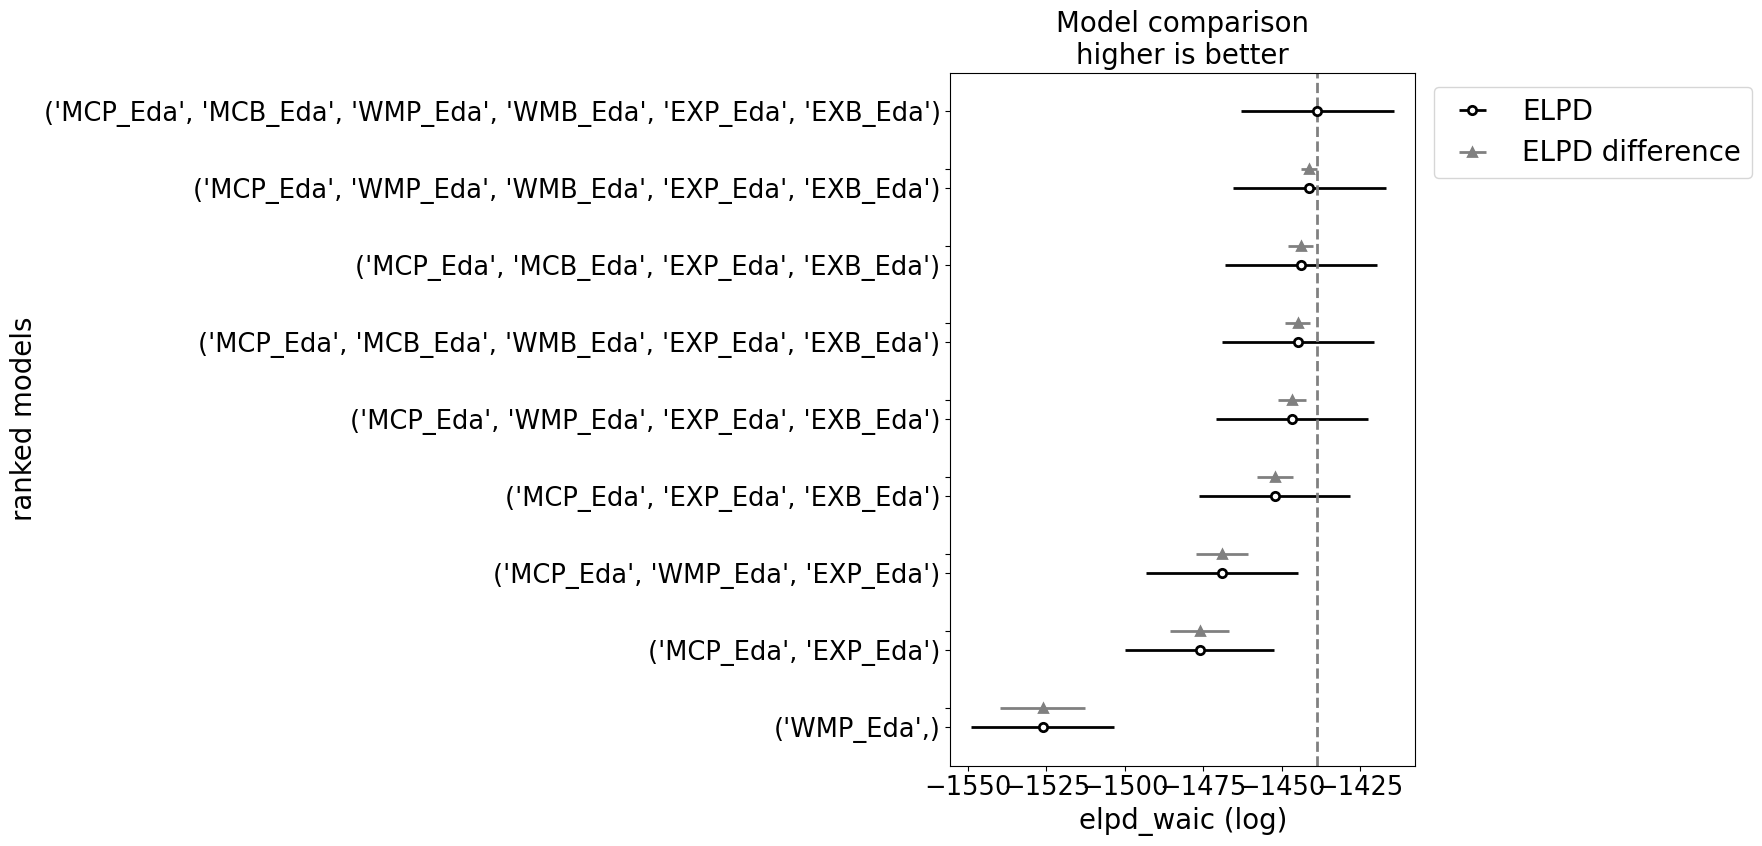

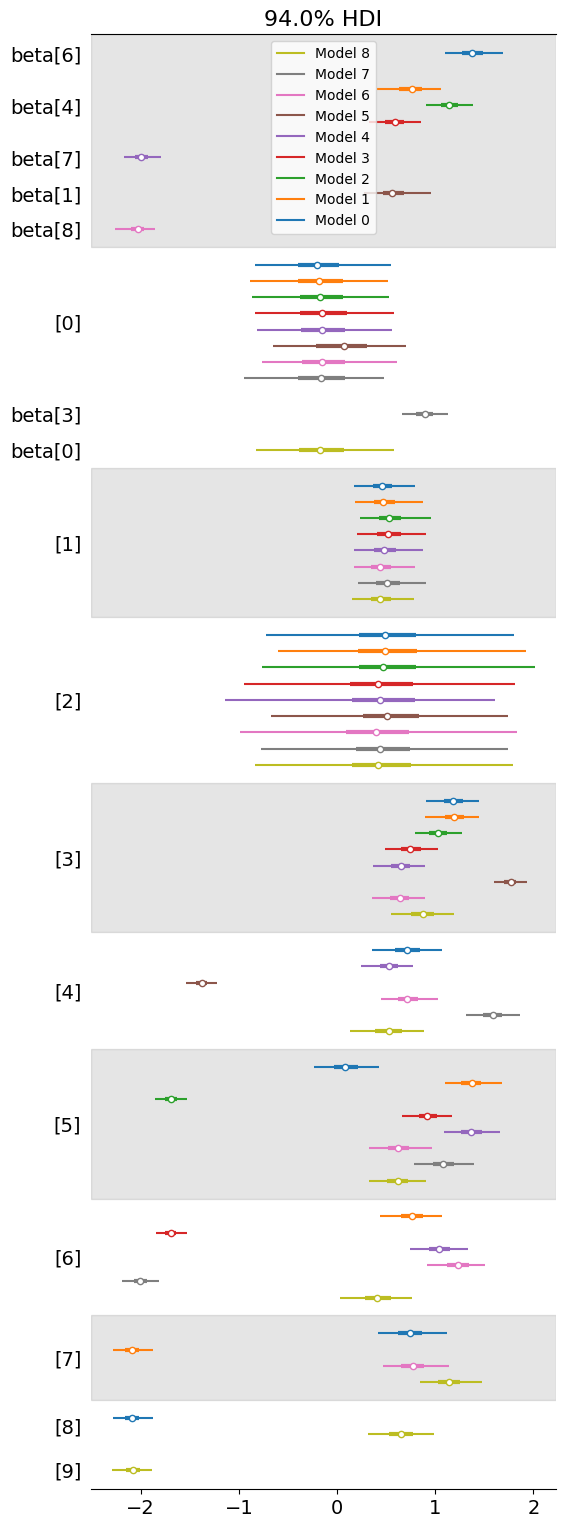

___ models for Aided_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:14<00:00, 207.68it/s, 15 steps of size 2.75e-01. acc. prob=0.85]


                                                    rank   elpd_waic  \
('MCP_Eda', 'MCB_Eda', 'WMP_Eda', 'WMB_Eda', 'E...     0 -395.965000   
('MCP_Eda', 'MCB_Eda', 'WMB_Eda', 'EXP_Eda', 'E...     1 -397.139948   
('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda')           2 -399.572312   
('MCP_Eda', 'WMP_Eda', 'WMB_Eda', 'EXP_Eda', 'E...     3 -400.485849   
('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda')           4 -405.877065   
('MCP_Eda', 'EXP_Eda', 'EXB_Eda')                      5 -407.704522   
('MCP_Eda', 'WMP_Eda', 'EXP_Eda')                      6 -436.166215   
('MCP_Eda', 'EXP_Eda')                                 7 -439.151752   
('WMP_Eda',)                                           8 -474.609171   

                                                      p_waic  elpd_diff  \
('MCP_Eda', 'MCB_Eda', 'WMP_Eda', 'WMB_Eda', 'E...  4.988567   0.000000   
('MCP_Eda', 'MCB_Eda', 'WMB_Eda', 'EXP_Eda', 'E...  4.909757   1.174948   
('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda')        4.

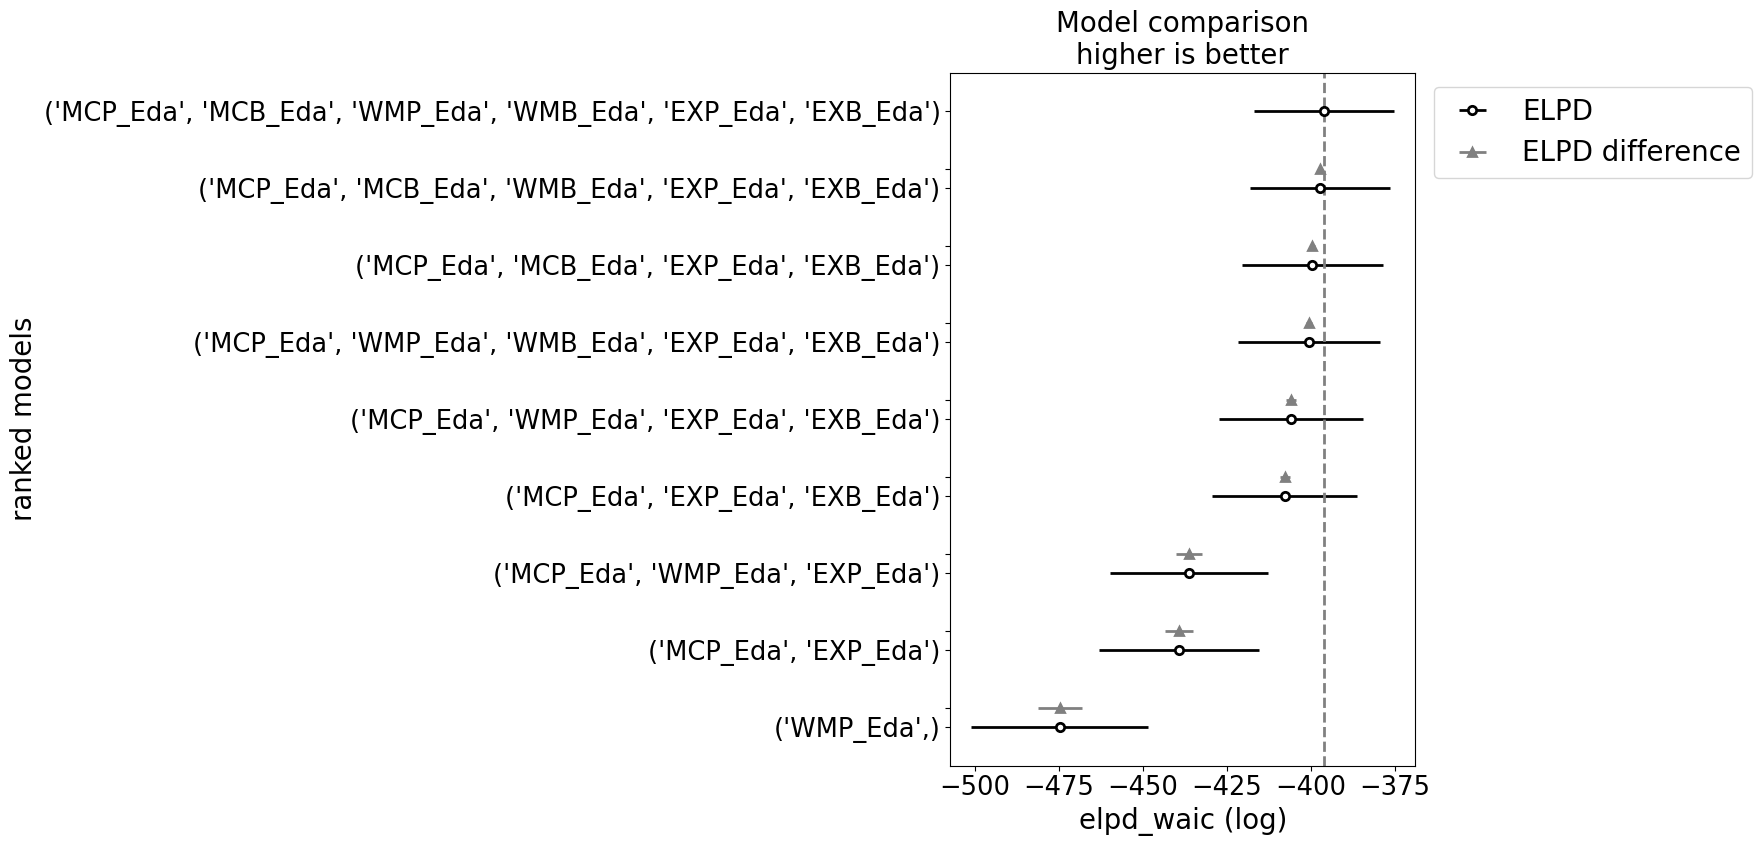

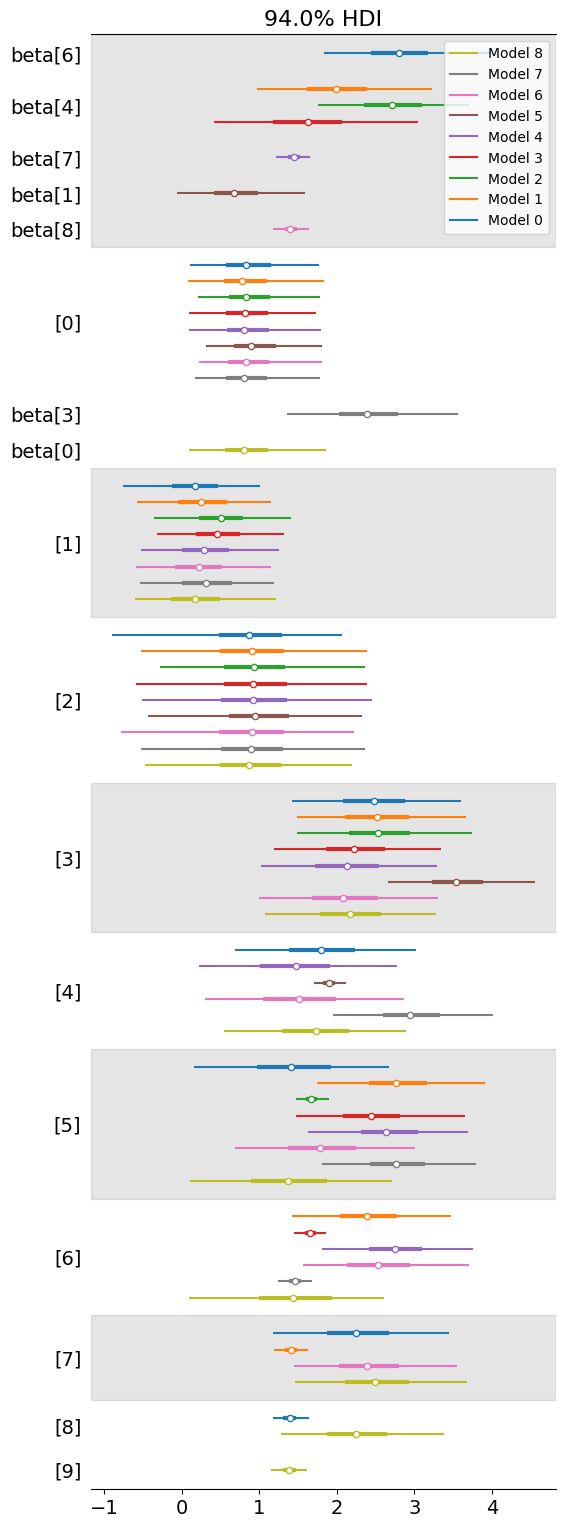

___ models for Consideration_Eda_TopBox_01


sample: 100%|██████████████████████████| 3000/3000 [00:28<00:00, 105.11it/s, 31 steps of size 1.27e-01. acc. prob=0.92]


                                                    rank    elpd_waic  \
('MCP_Eda', 'WMP_Eda', 'WMB_Eda', 'EXP_Eda', 'E...     0 -1210.255393   
('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda')           1 -1210.794458   
('MCP_Eda', 'MCB_Eda', 'WMP_Eda', 'WMB_Eda', 'E...     2 -1210.999253   
('MCP_Eda', 'WMP_Eda', 'EXP_Eda')                      3 -1219.563013   
('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda')           4 -1221.975577   
('MCP_Eda', 'MCB_Eda', 'WMB_Eda', 'EXP_Eda', 'E...     5 -1222.203342   
('MCP_Eda', 'EXP_Eda', 'EXB_Eda')                      6 -1222.482447   
('MCP_Eda', 'EXP_Eda')                                 7 -1233.540804   
('WMP_Eda',)                                           8 -1255.022995   

                                                       p_waic  elpd_diff  \
('MCP_Eda', 'WMP_Eda', 'WMB_Eda', 'EXP_Eda', 'E...  10.060713   0.000000   
('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda')         9.174377   0.539065   
('MCP_Eda', 'MCB_Eda', 'WMP_Eda', 'WMB_Ed

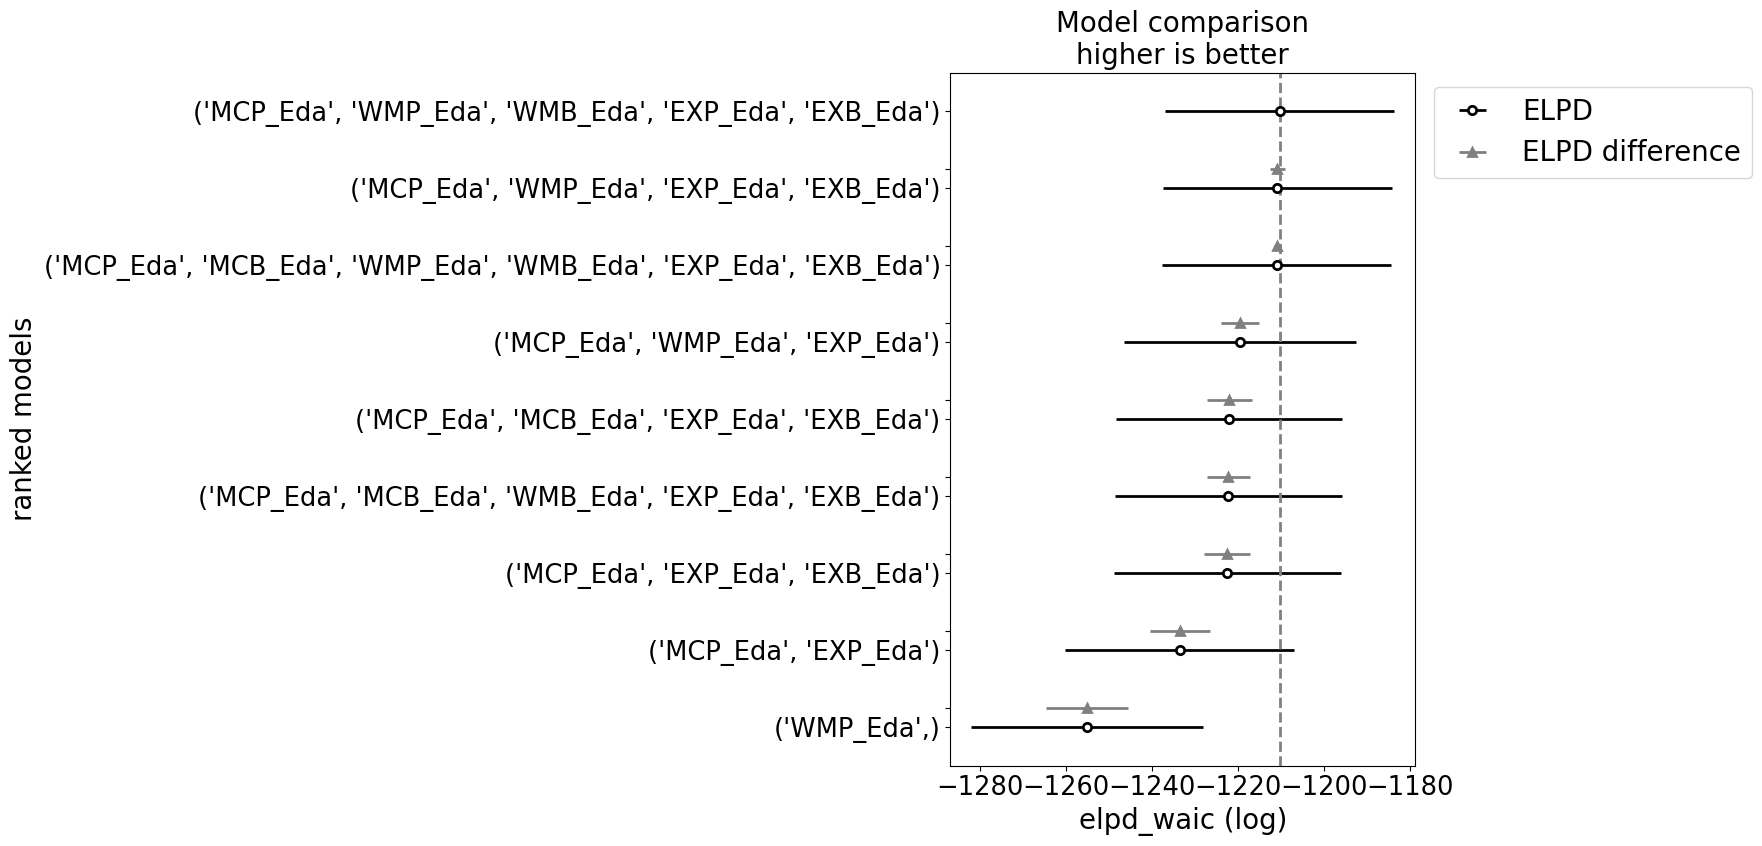

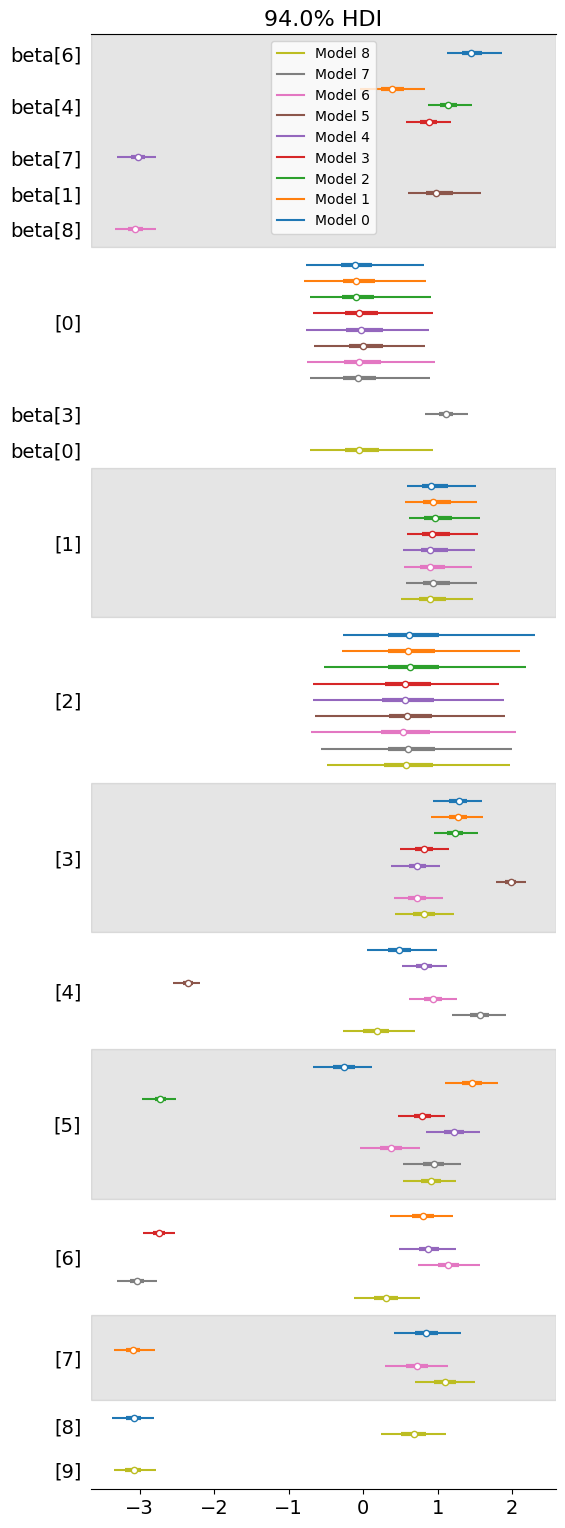

In [6]:
utl = ModelBuildUtils() 
sets = utl.ValidateNonMedia(model_spec, model_data, max_variables=6)

True
{'Target variables': ['KPIA_Eda_01', 'Aided_Eda_01', 'Consideration_Eda_TopBox_01'], 'Media variables': ['tv_fr', 'show_fr', 'radio_freq'], 'Non-media variables': ['MC_Eda', 'WM_Eda', 'EX_Eda'], 'Relevance groups variable': None, 'Report split variables': None}
Stage 1 of 2. Selecting variables with LogisticRegression and SelectFromModel
New variable set found: ('MC_Eda', 'WM_Eda', 'EX_Eda')
New variable set found: ('MC_Eda', 'EX_Eda')
New variable set found: ('EX_Eda',)
New variable set found: ('WM_Eda',)
Found 4 variable sets to test
All sets: {('MC_Eda', 'WM_Eda', 'EX_Eda'), ('EX_Eda',), ('WM_Eda',), ('MC_Eda', 'EX_Eda')}
Stage 2 of 2. Comparing models with these setes
___ models for KPIA_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:26<00:00, 113.60it/s, 15 steps of size 1.11e-01. acc. prob=0.93]


                                rank    elpd_waic    p_waic  elpd_diff  \
('MC_Eda', 'WM_Eda', 'EX_Eda')     0 -1435.490396  7.684461   0.000000   
('MC_Eda', 'EX_Eda')               1 -1441.034833  6.762308   5.544437   
('EX_Eda',)                        2 -1471.171886  6.499588  35.681490   
('WM_Eda',)                        3 -1499.511216  6.707168  64.020820   

                                      weight         se        dse  warning  \
('MC_Eda', 'WM_Eda', 'EX_Eda')  9.142911e-01  23.786984   0.000000    False   
('MC_Eda', 'EX_Eda')            8.570888e-02  23.606415   3.675339    False   
('EX_Eda',)                     7.897828e-16  22.868105   8.403207    False   
('WM_Eda',)                     0.000000e+00  23.004952  11.352897    False   

                               scale  
('MC_Eda', 'WM_Eda', 'EX_Eda')   log  
('MC_Eda', 'EX_Eda')             log  
('EX_Eda',)                      log  
('WM_Eda',)                      log  


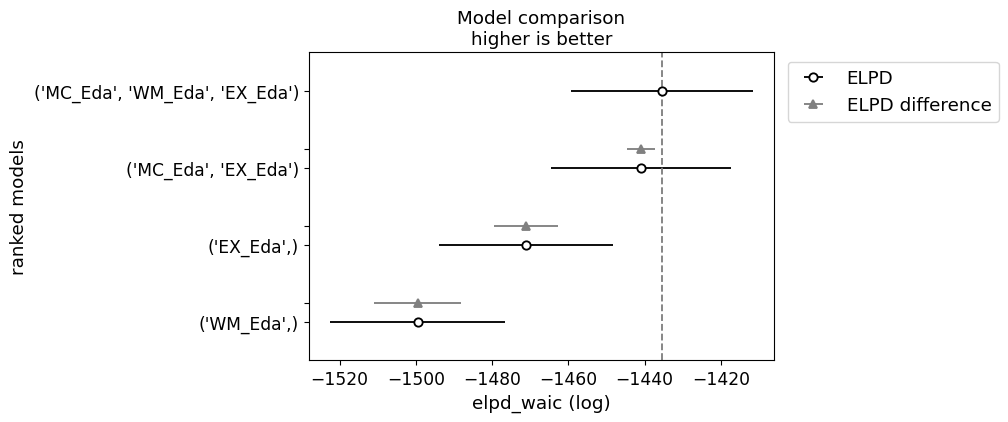

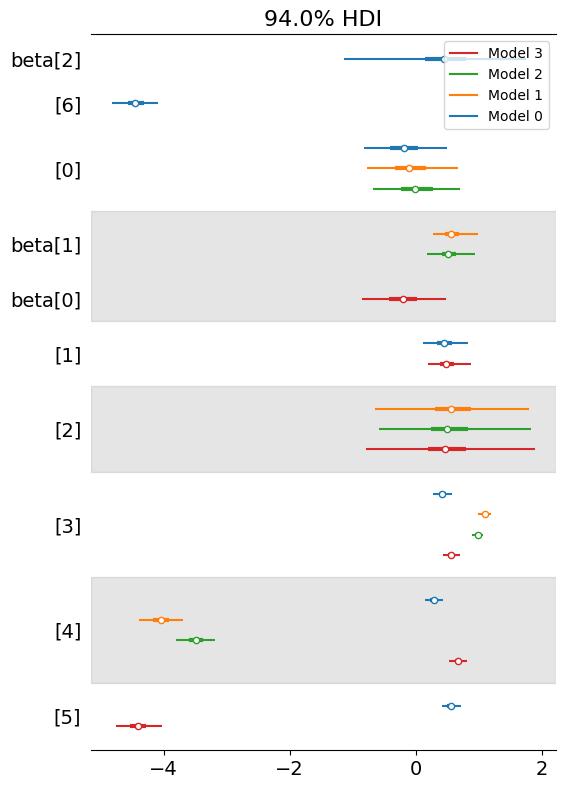

___ models for Aided_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:19<00:00, 156.79it/s, 31 steps of size 1.55e-01. acc. prob=0.91]


                                rank   elpd_waic    p_waic  elpd_diff  weight  \
('MC_Eda', 'WM_Eda', 'EX_Eda')     0 -435.878191  5.462348   0.000000     1.0   
('MC_Eda', 'EX_Eda')               1 -436.140157  5.325144   0.261966     0.0   
('EX_Eda',)                        2 -446.405898  5.022333  10.527707     0.0   
('WM_Eda',)                        3 -472.173219  4.930732  36.295029     0.0   

                                       se       dse  warning scale  
('MC_Eda', 'WM_Eda', 'EX_Eda')  23.695968  0.000000    False   log  
('MC_Eda', 'EX_Eda')            23.694664  0.477582    False   log  
('EX_Eda',)                     24.368598  2.016753    False   log  
('WM_Eda',)                     26.273064  4.161641    False   log  


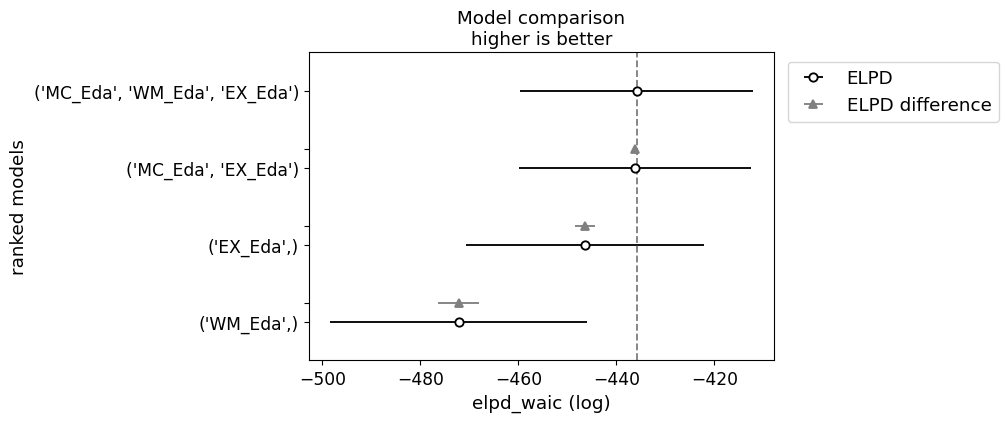

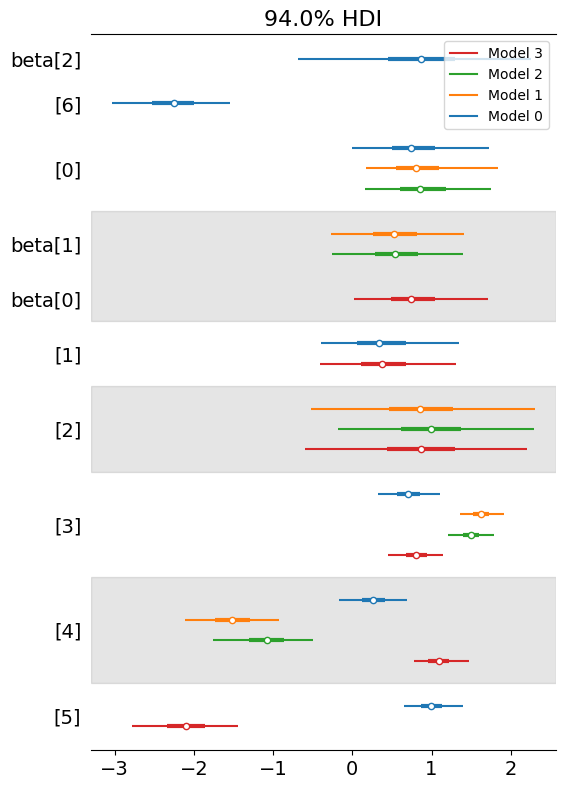

___ models for Consideration_Eda_TopBox_01


sample: 100%|███████████████████████████| 3000/3000 [00:31<00:00, 95.74it/s, 63 steps of size 9.35e-02. acc. prob=0.91]


                                rank    elpd_waic    p_waic  elpd_diff  \
('MC_Eda', 'WM_Eda', 'EX_Eda')     0 -1210.731149  8.040552   0.000000   
('MC_Eda', 'EX_Eda')               1 -1222.771254  7.108981  12.040105   
('WM_Eda',)                        2 -1245.874948  6.149315  35.143799   
('EX_Eda',)                        3 -1247.744536  6.064144  37.013386   

                                  weight         se       dse  warning scale  
('MC_Eda', 'WM_Eda', 'EX_Eda')  0.972525  25.734475  0.000000    False   log  
('MC_Eda', 'EX_Eda')            0.017446  25.493914  4.949566    False   log  
('WM_Eda',)                     0.000000  26.265220  8.156059    False   log  
('EX_Eda',)                     0.010029  25.312937  8.423933    False   log  


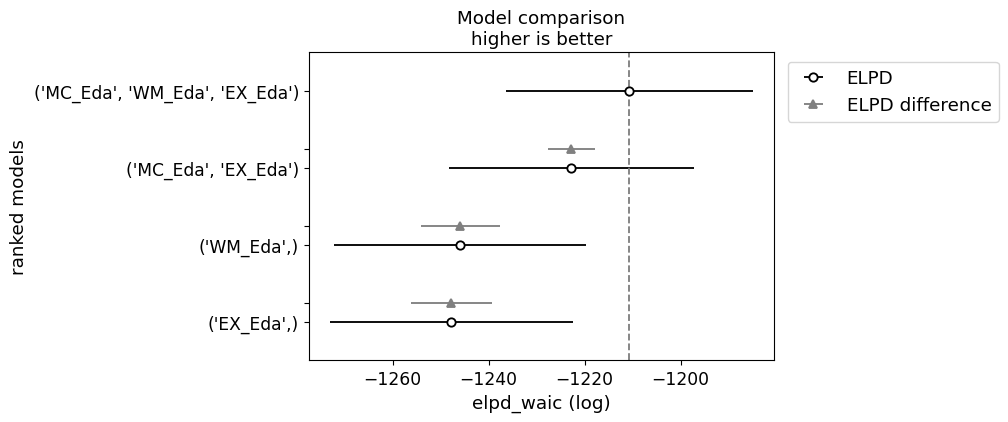

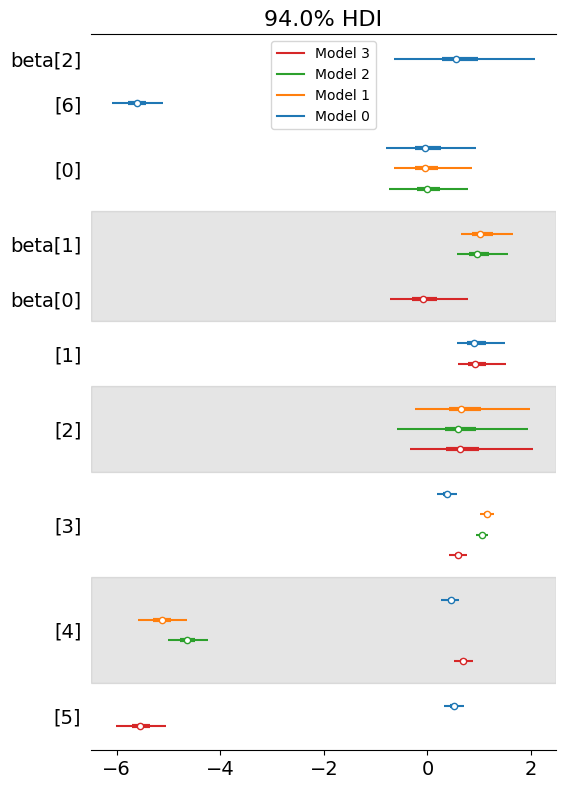

In [10]:
# scales

model_spec = ModelSpec().FromLists(
    #targets=['KPIA_Eda_01', 'Aided_Eda_01', 'Tried_Eda_01', 'Use_Eda_01', 'Consideration_Eda_TopBox_01'],
    targets=['KPIA_Eda_01', 'Aided_Eda_01', 'Consideration_Eda_TopBox_01'],
    media=['tv_fr', 'show_fr', 'radio_freq'],
    #non_media=['MCP_Eda', 'MCB_Eda', 'MCN_Eda', 'WMP_Eda', 'WMB_Eda', 'WMN_Eda', 'EXP_Eda', 'EXB_Eda', 'EXN_Eda'], 
    non_media=['MC_Eda', 'WM_Eda', 'EX_Eda'], 
    relevance_groups=None,
    report_splits=None
)

print(model_spec.ValidateSpecVsData(model_data))
print(model_spec)

utl = ModelBuildUtils() 
sets = utl.ValidateNonMedia(model_spec, model_data, max_variables=3)

## final

___ models for KPIA_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:17<00:00, 172.25it/s, 15 steps of size 1.91e-01. acc. prob=0.92]


                                              rank    elpd_waic    p_waic  \
('MC_Eda', 'WM_Eda', 'EX_Eda')                   0 -1435.174821  7.780705   
('MC_Eda', 'EX_Eda')                             1 -1440.520584  6.650258   
('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda')     2 -1443.932229  8.955677   
('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda')     3 -1446.653766  8.844989   

                                              elpd_diff        weight  \
('MC_Eda', 'WM_Eda', 'EX_Eda')                 0.000000  8.751053e-01   
('MC_Eda', 'EX_Eda')                           5.345764  1.248947e-01   
('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda')   8.757408  0.000000e+00   
('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda')  11.478945  1.509903e-14   

                                                     se       dse  warning  \
('MC_Eda', 'WM_Eda', 'EX_Eda')                24.428925  0.000000    False   
('MC_Eda', 'EX_Eda')                          24.219975  3.790770    False   
('MCP_Eda', 'M

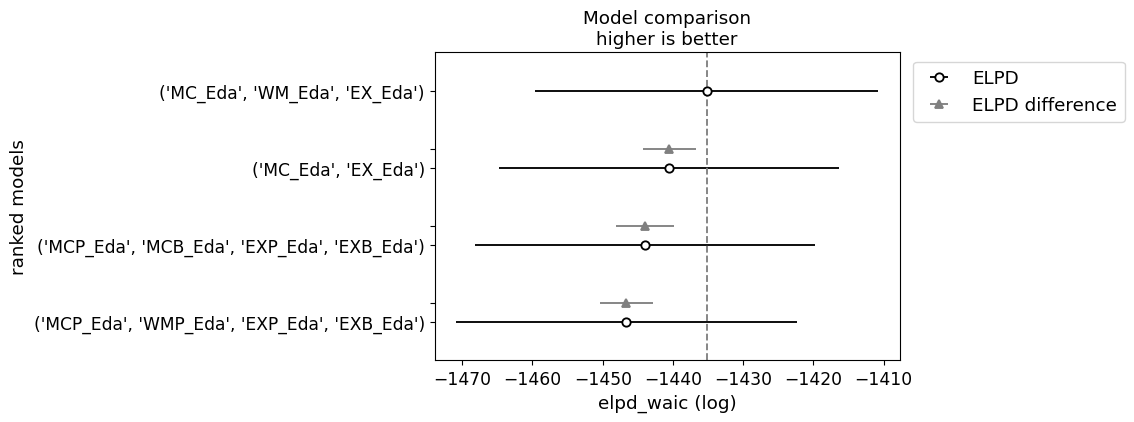

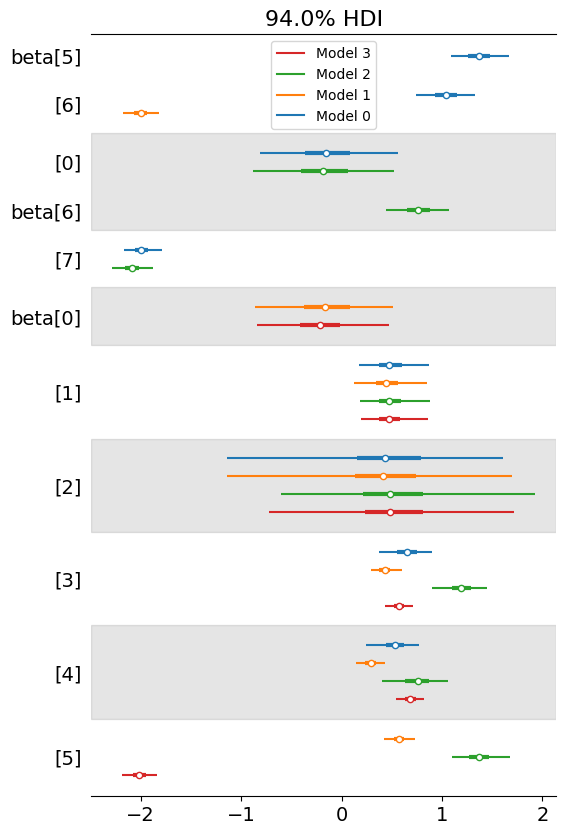

___ models for KPIB_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:17<00:00, 174.10it/s, 15 steps of size 1.89e-01. acc. prob=0.88]


                                              rank    elpd_waic    p_waic  \
('MC_Eda', 'EX_Eda')                             0 -1530.297807  7.343018   
('MC_Eda', 'WM_Eda', 'EX_Eda')                   1 -1530.744455  8.478583   
('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda')     2 -1533.296952  9.625008   
('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda')     3 -1538.470374  9.416782   

                                              elpd_diff        weight  \
('MC_Eda', 'EX_Eda')                           0.000000  7.866811e-01   
('MC_Eda', 'WM_Eda', 'EX_Eda')                 0.446648  2.133189e-01   
('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda')   2.999145  0.000000e+00   
('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda')   8.172567  1.110223e-16   

                                                     se       dse  warning  \
('MC_Eda', 'EX_Eda')                          22.818266  0.000000    False   
('MC_Eda', 'WM_Eda', 'EX_Eda')                22.848084  1.248504    False   
('MCP_Eda', 'M

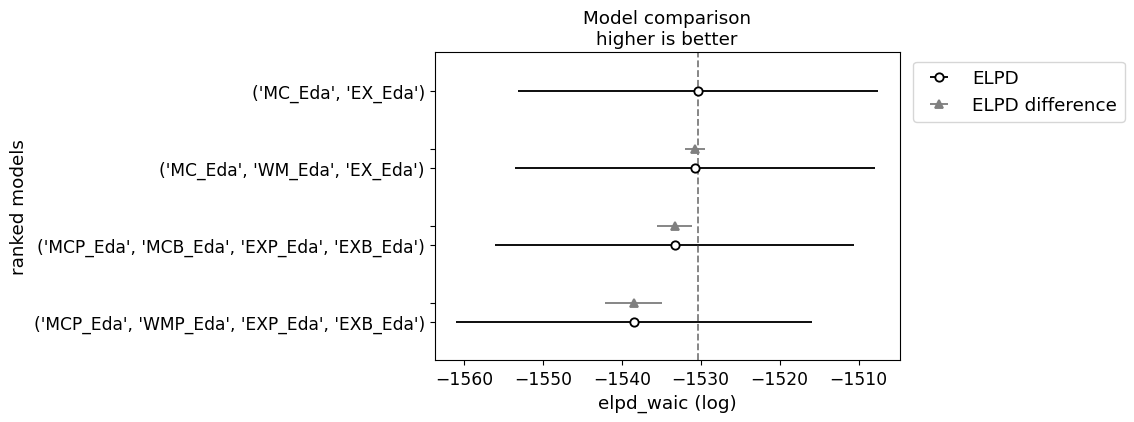

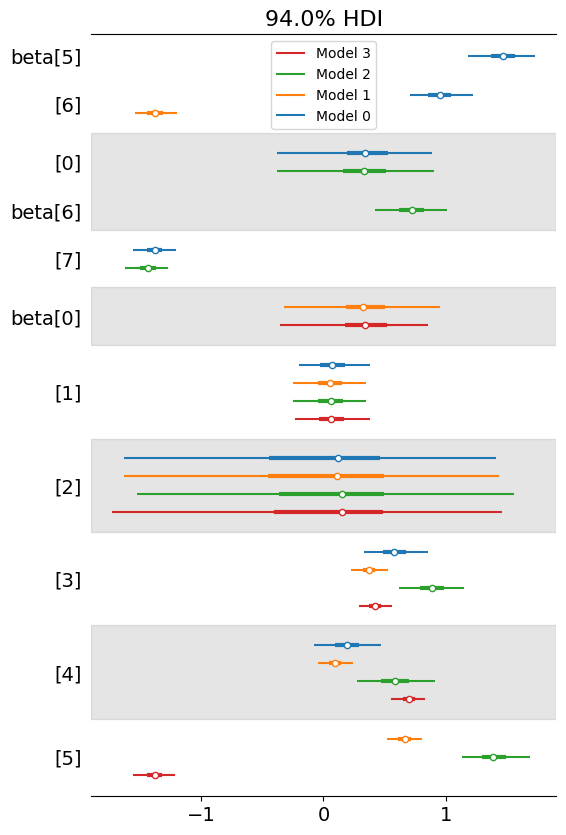

___ models for KPIC_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 192.26it/s, 15 steps of size 2.31e-01. acc. prob=0.85]


                                              rank    elpd_waic    p_waic  \
('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda')     0 -1530.479540  8.743814   
('MC_Eda', 'WM_Eda', 'EX_Eda')                   1 -1531.341642  7.744627   
('MC_Eda', 'EX_Eda')                             2 -1532.090365  6.948414   
('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda')     3 -1535.444684  8.979053   

                                              elpd_diff        weight  \
('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda')   0.000000  5.682101e-01   
('MC_Eda', 'WM_Eda', 'EX_Eda')                 0.862102  4.317899e-01   
('MC_Eda', 'EX_Eda')                           1.610826  0.000000e+00   
('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda')   4.965144  2.220446e-16   

                                                     se       dse  warning  \
('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda')  22.539923  0.000000    False   
('MC_Eda', 'WM_Eda', 'EX_Eda')                22.687625  3.230558    False   
('MC_Eda', 'EX

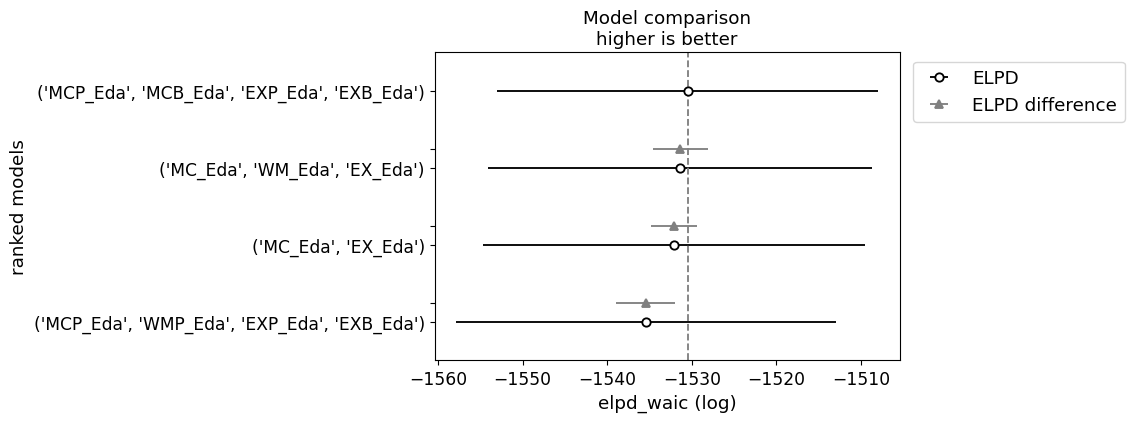

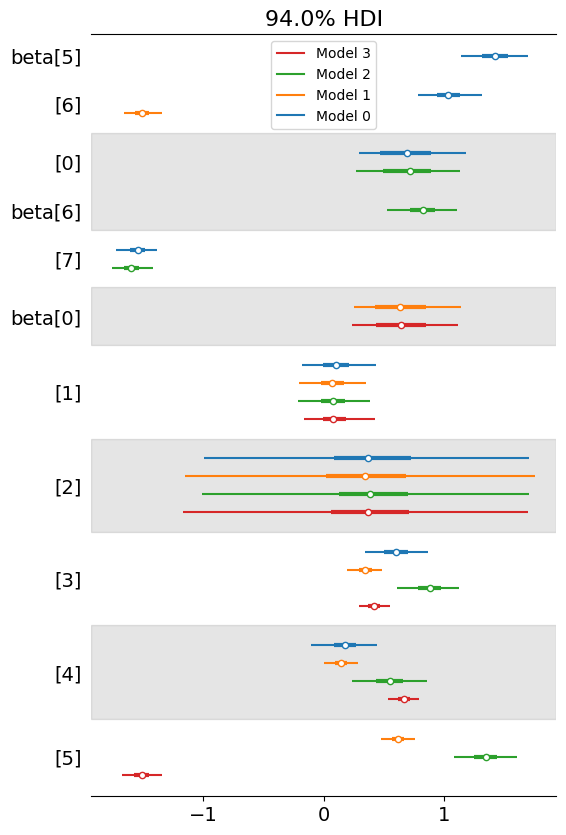

___ models for KPID_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 194.63it/s, 15 steps of size 2.07e-01. acc. prob=0.90]


                                              rank    elpd_waic    p_waic  \
('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda')     0 -1532.983726  8.131536   
('MC_Eda', 'EX_Eda')                             1 -1533.282676  6.188219   
('MC_Eda', 'WM_Eda', 'EX_Eda')                   2 -1533.933322  7.181391   
('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda')     3 -1541.519344  7.909759   

                                              elpd_diff        weight  \
('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda')   0.000000  5.136034e-01   
('MC_Eda', 'EX_Eda')                           0.298950  4.863966e-01   
('MC_Eda', 'WM_Eda', 'EX_Eda')                 0.949596  0.000000e+00   
('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda')   8.535619  2.220446e-16   

                                                     se       dse  warning  \
('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda')  22.685651  0.000000    False   
('MC_Eda', 'EX_Eda')                          22.781088  2.895699    False   
('MC_Eda', 'WM

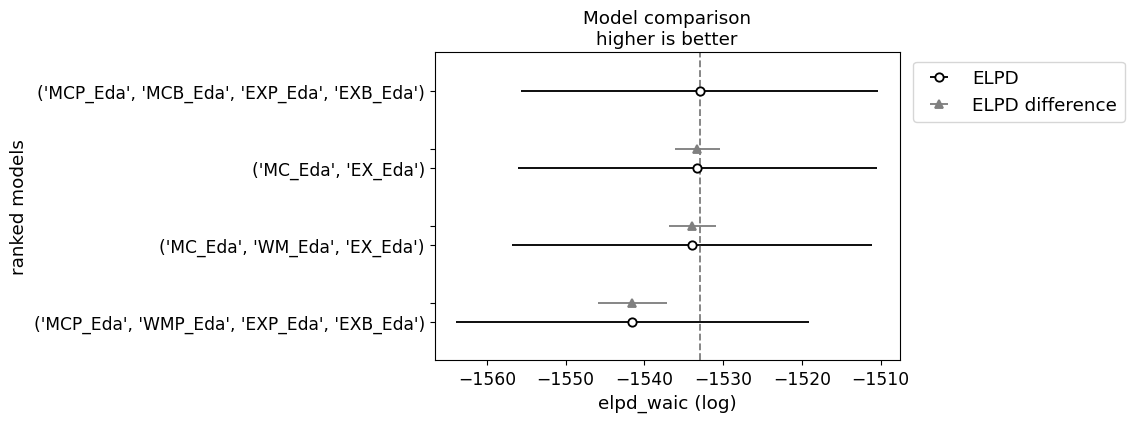

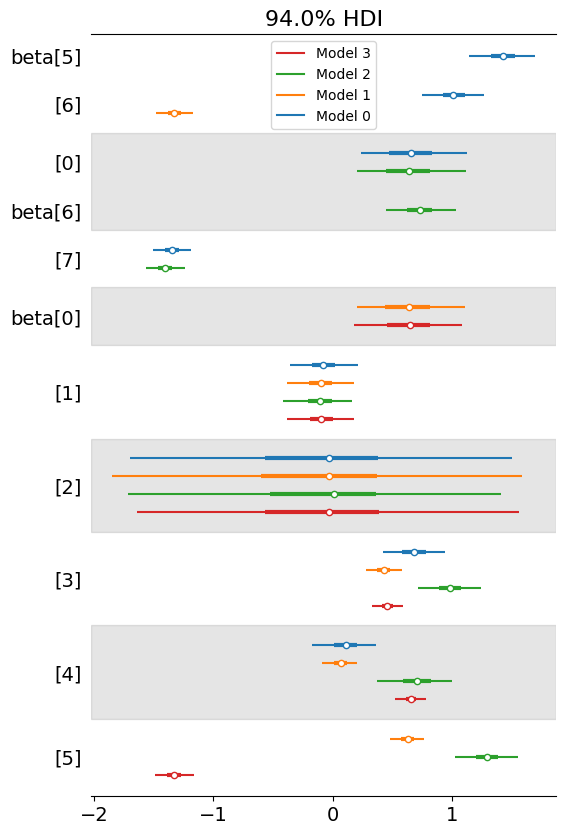

___ models for KPIE_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:20<00:00, 149.39it/s, 31 steps of size 1.43e-01. acc. prob=0.92]


KeyboardInterrupt: 

In [23]:
var_sets = {
    ('MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda'),
    ('MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda'), 
    ('MC_Eda', 'WM_Eda', 'EX_Eda'),
    ('MC_Eda', 'EX_Eda'),
}

utl.CompareNonMedia(var_sets, model_spec, model_data)

# Validate RG

In [71]:
rg_candiates = ['Service_Eda_usage', None]

## process

In [60]:
rg_names = ['Service_Eda_usage', 'food_consider', 'Use_Eda_01']

for rg in rg_names:
    print(rg, model_data[rg].value_counts())

Service_Eda_usage Service_Eda_usage
1.0    1825
2.0     482
3.0     333
Name: count, dtype: int64
food_consider food_consider
1.0    2307
0.0     333
Name: count, dtype: int64
Use_Eda_01 Use_Eda_01
0.0    1653
1.0     987
Name: count, dtype: int64


sample: 100%|███████████████████████████| 3000/3000 [00:40<00:00, 74.62it/s, 63 steps of size 7.25e-02. acc. prob=0.92]
C:\Users\vbondarenko\AppData\Local\anaconda3\envs\for_pyro\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
C:\Users\vbondarenko\AppData\Local\anaconda3\envs\for_pyro\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


                                rank    elpd_waic     p_waic   elpd_diff  \
Tried_Eda_01 Service_Eda_usage     0 -1360.053610  22.551125    0.000000   
Tried_Eda_01 food_consider         1 -1448.029106  15.906225   87.975496   
Tried_Eda_01                       2 -1522.647946  10.240019  162.594336   

                                      weight         se        dse  warning  \
Tried_Eda_01 Service_Eda_usage  9.433718e-01  26.475234   0.000000     True   
Tried_Eda_01 food_consider      2.453336e-16  24.424338  14.225758     True   
Tried_Eda_01                    5.662818e-02  23.015500  18.665923    False   

                               scale  
Tried_Eda_01 Service_Eda_usage   log  
Tried_Eda_01 food_consider       log  
Tried_Eda_01                     log  


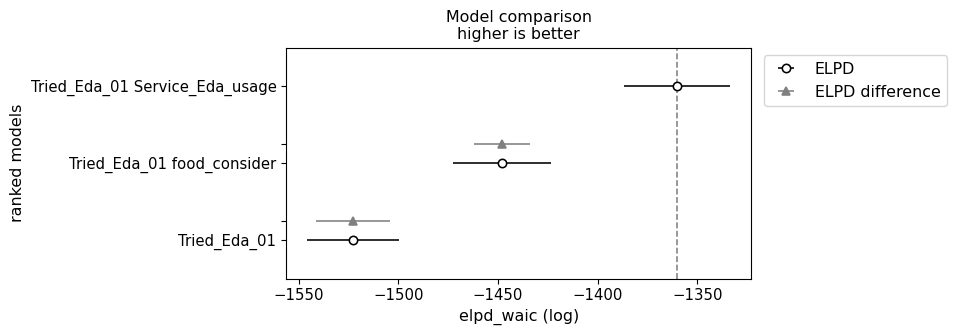

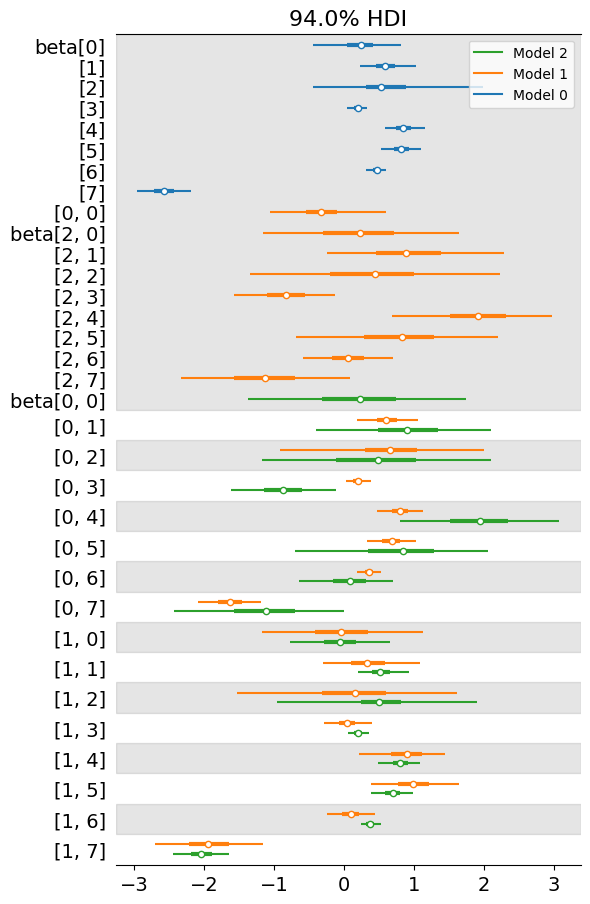

C:\Users\vbondarenko\AppData\Local\anaconda3\envs\for_pyro\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
C:\Users\vbondarenko\AppData\Local\anaconda3\envs\for_pyro\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


                               rank    elpd_waic     p_waic  elpd_diff  \
KPIA_Eda_01 Service_Eda_usage     0 -1418.230650  19.990177   0.000000   
KPIA_Eda_01 food_consider         1 -1421.020397  13.760333   2.789747   
KPIA_Eda_01                       2 -1435.252309   8.691545  17.021660   

                                 weight         se       dse  warning scale  
KPIA_Eda_01 Service_Eda_usage  0.635869  23.539185  0.000000     True   log  
KPIA_Eda_01 food_consider      0.243194  23.534424  4.664648     True   log  
KPIA_Eda_01                    0.120936  24.006133  7.663938    False   log  


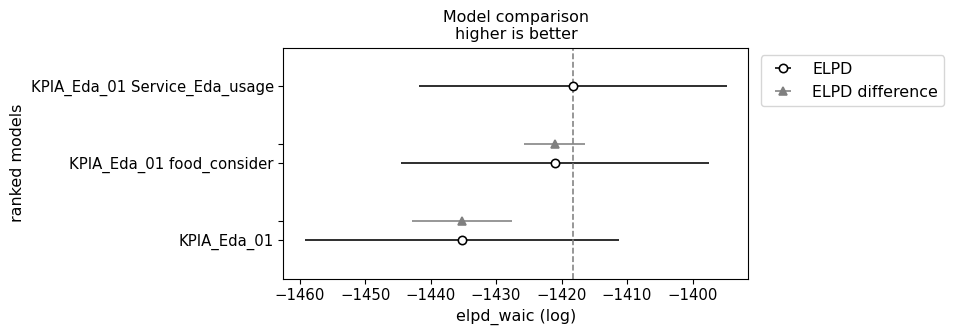

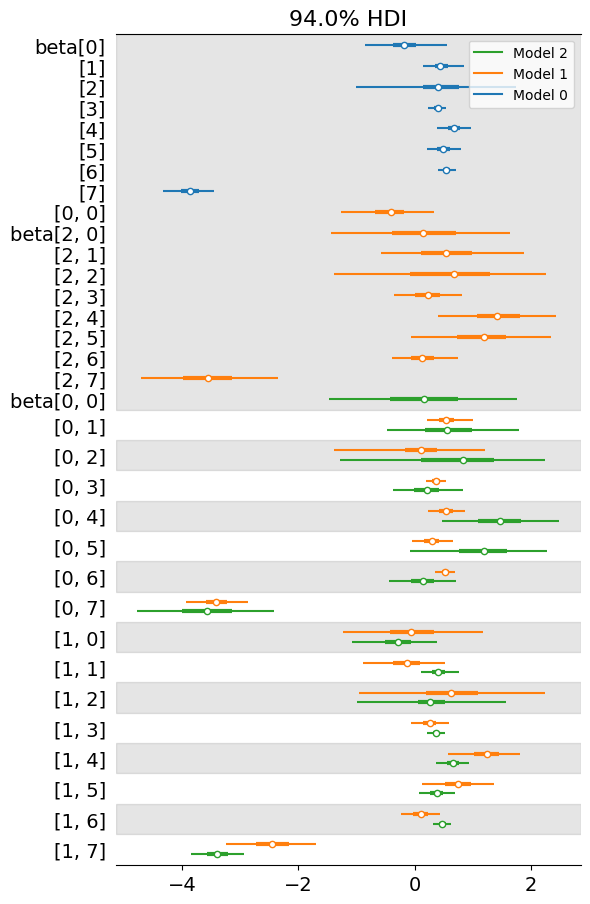

C:\Users\vbondarenko\AppData\Local\anaconda3\envs\for_pyro\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
C:\Users\vbondarenko\AppData\Local\anaconda3\envs\for_pyro\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


                                               rank    elpd_waic     p_waic  \
Consideration_Eda_TopBox_01 Service_Eda_usage     0 -1193.111903  20.134960   
Consideration_Eda_TopBox_01 food_consider         1 -1204.734865  13.166042   
Consideration_Eda_TopBox_01                       2 -1211.030116   8.905314   

                                               elpd_diff    weight         se  \
Consideration_Eda_TopBox_01 Service_Eda_usage   0.000000  0.774718  25.973550   
Consideration_Eda_TopBox_01 food_consider      11.622962  0.000000  25.719839   
Consideration_Eda_TopBox_01                    17.918213  0.225282  26.110241   

                                                    dse  warning scale  
Consideration_Eda_TopBox_01 Service_Eda_usage  0.000000     True   log  
Consideration_Eda_TopBox_01 food_consider      6.529363     True   log  
Consideration_Eda_TopBox_01                    8.854830    False   log  


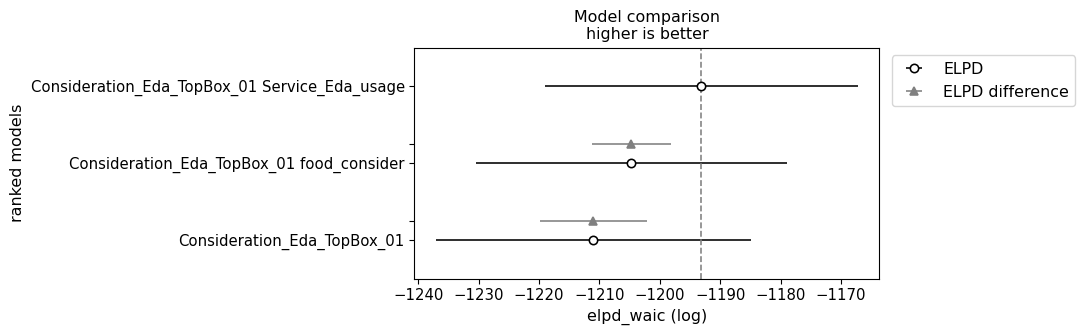

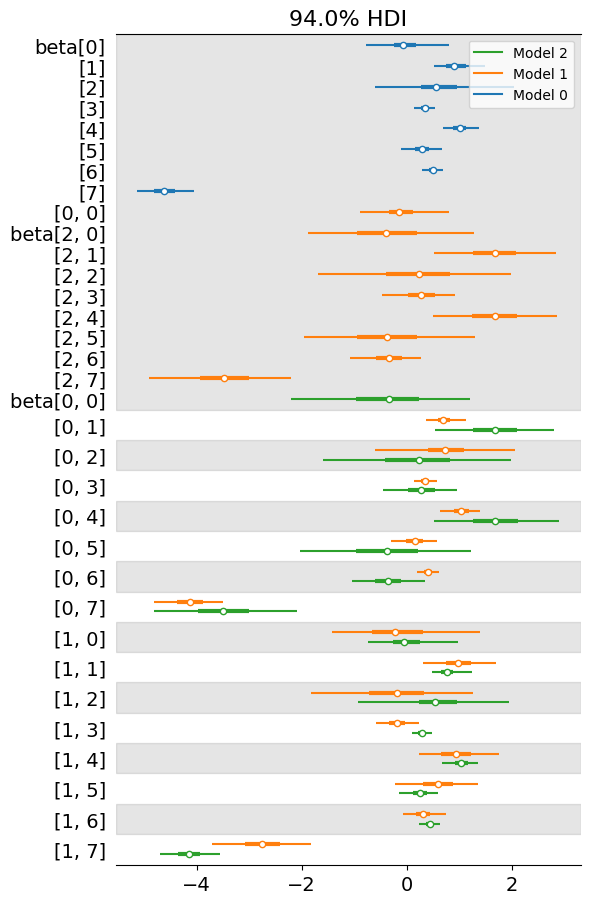

C:\Users\vbondarenko\AppData\Local\anaconda3\envs\for_pyro\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
C:\Users\vbondarenko\AppData\Local\anaconda3\envs\for_pyro\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


                              rank    elpd_waic     p_waic   elpd_diff  \
Use_Eda_01 Service_Eda_usage     0 -1269.627468  22.363829    0.000000   
Use_Eda_01 food_consider         1 -1339.533494  14.408799   69.906026   
Use_Eda_01                       2 -1375.037755   9.914576  105.410287   

                                weight         se        dse  warning scale  
Use_Eda_01 Service_Eda_usage  0.907913  26.134549   0.000000     True   log  
Use_Eda_01 food_consider      0.000000  24.464550  12.826566     True   log  
Use_Eda_01                    0.092087  24.370671  15.772550    False   log  


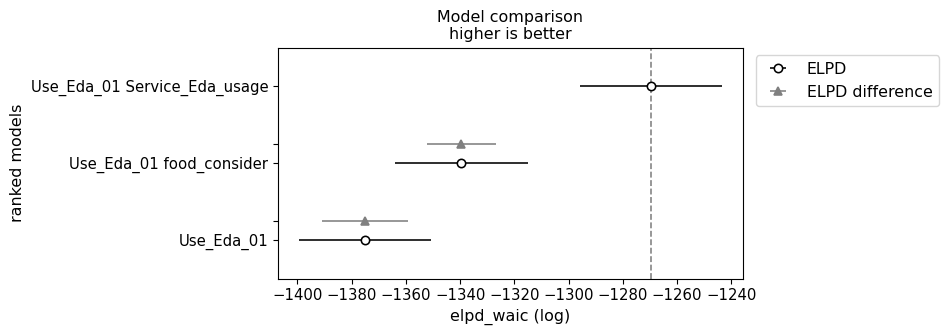

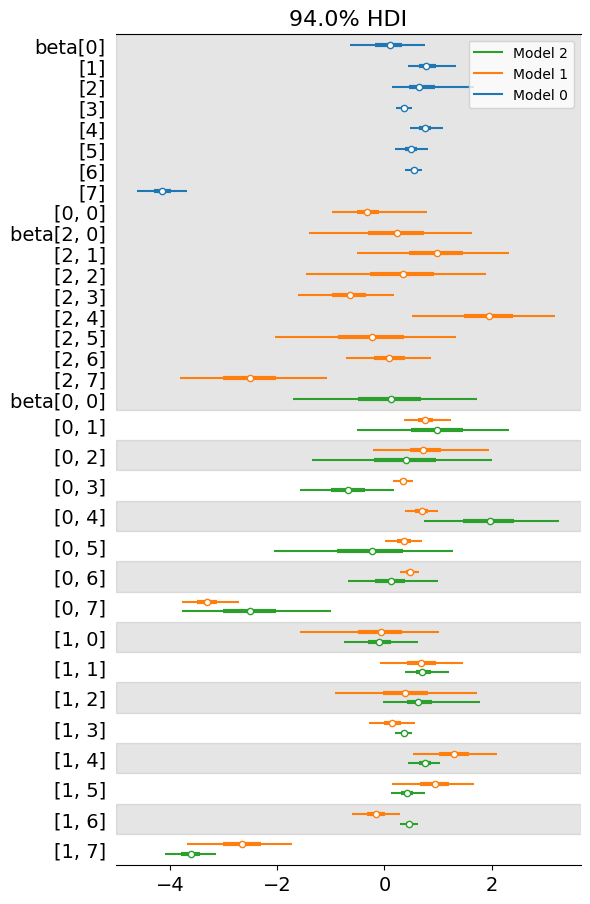

                                rank   elpd_waic    p_waic  elpd_diff  \
Aided_Eda_01 food_consider         0 -381.662987  7.695663   0.000000   
Aided_Eda_01 Service_Eda_usage     1 -385.067289  9.572824   3.404302   
Aided_Eda_01                       2 -422.723615  5.234979  41.060628   

                                      weight         se      dse  warning  \
Aided_Eda_01 food_consider      9.326123e-01  22.292451  0.00000    False   
Aided_Eda_01 Service_Eda_usage  1.428607e-14  22.706212  0.93404    False   
Aided_Eda_01                    6.738766e-02  22.753996  9.96442    False   

                               scale  
Aided_Eda_01 food_consider       log  
Aided_Eda_01 Service_Eda_usage   log  
Aided_Eda_01                     log  


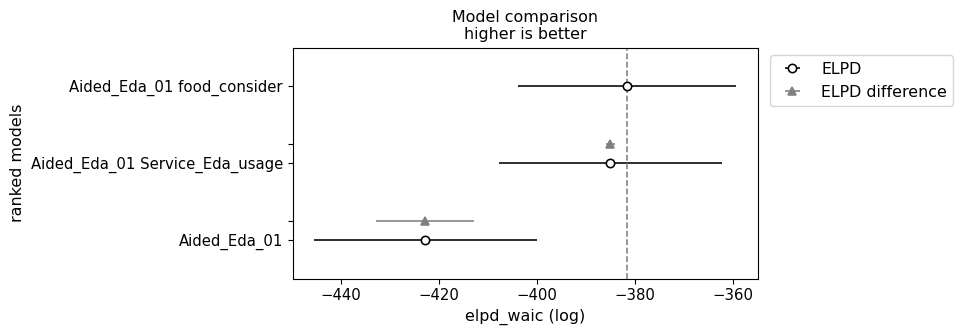

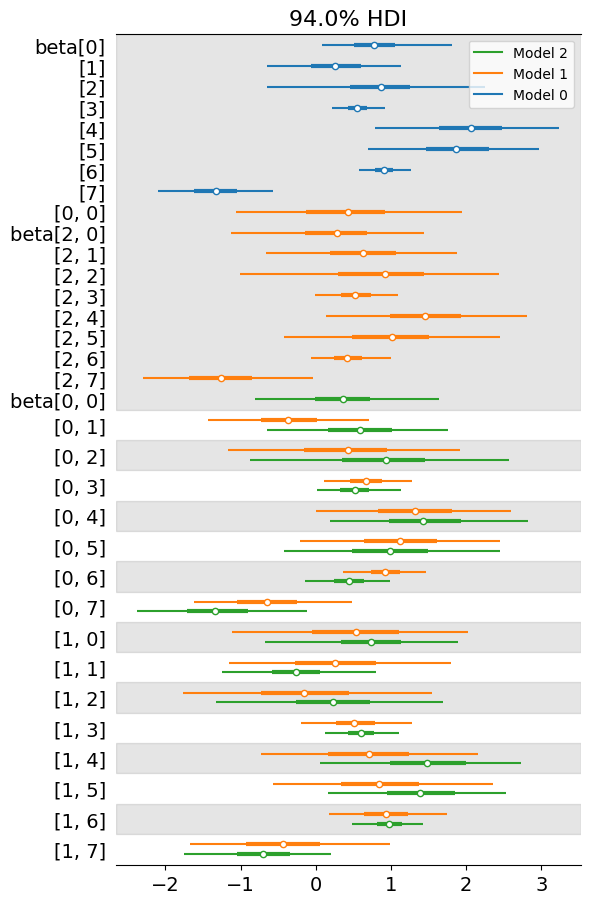

In [64]:
model_spec = ModelSpec().FromLists(
    targets=['KPIA_Eda_01', 'Aided_Eda_01', 'Tried_Eda_01', 'Use_Eda_01', 'Consideration_Eda_TopBox_01'],
    media=['tv_fr', 'show_fr', 'radio_freq'],
    non_media=['MC_Eda', 'WMP_Eda', 'WMB_Eda', 'EX_Eda'], 
    relevance_groups=['Service_Eda_usage', 'food_consider'],
    report_splits=None
)

model_spec.ValidateSpecVsData(model_data) 

ModelBuildUtils().ValidateRelevanceGroups(model_spec, model_data)

# Contributions 

## V1

In [32]:
non_media_candidates = [
    ['MCP_Eda', 'WMP_Eda', 'EXP_Eda', 'EXB_Eda'],
    ['MCP_Eda', 'MCB_Eda', 'EXP_Eda', 'EXB_Eda'],
    ['MC_Eda', 'WM_Eda', 'EX_Eda'],
    ['MC_Eda', 'EX_Eda']
]

rg_candiates = [
    'Service_Eda_usage', 
    None
]

targets = [
    'KPIA_Eda_01', 'KPIB_Eda_01', 'KPIC_Eda_01', 'KPID_Eda_01', 'KPIE_Eda_01', 
    'Aided_Eda_01', 'Aided_ST_Eda_01', 'Tried_Eda_01', 'MostOften_Eda_01', 'Use_Eda_01', 
    'Consideration_Eda_TopBox_01', 'Consideration_Eda_T2B_01', 
]

reporter = ExcelReportBuilder("../17583/decompositions_eda.xlsx")

for inc, nc in enumerate(non_media_candidates):
    for irg, rg in enumerate(rg_candiates):
        
        model_spec = ModelSpec().FromLists(
            targets=targets, 
            media=['tv_fr', 'show_fr', 'radio_freq'],
            non_media=nc, 
            relevance_groups=rg,
            report_splits=['SEX', 'AgeBands', 'age_1845', 'REGION', 'Service_Eda_usage', 'food_consider']
        )

        assert model_spec.ValidateSpecVsData(model_data, show_missing=False) 
        xmc = MediaDecomposition()
        xmc.Fit(model_spec, model_data, show_traces=False, num_samples=2000, num_chains=4)
        reporter.AddTable(xmc.Contributions(), 
                          "{}_{}".format(inc, irg), 
                          title="Decomposition", 
                          description="Non media: {}, rg: {}".format("|".join(nc), str(rg)))

reporter.SaveToFile()
    

C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIA_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 182.28it/s, 31 steps of size 1.62e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIB_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 184.81it/s, 31 steps of size 1.63e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIC_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 177.72it/s, 31 steps of size 1.45e-01. acc. prob=0.93]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPID_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 185.37it/s, 31 steps of size 1.63e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIE_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:17<00:00, 174.56it/s, 31 steps of size 1.34e-01. acc. prob=0.93]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:09<00:00, 304.95it/s, 15 steps of size 2.63e-01. acc. prob=0.83]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_ST_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 198.11it/s, 15 steps of size 1.78e-01. acc. prob=0.90]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Tried_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 177.81it/s, 31 steps of size 1.62e-01. acc. prob=0.93]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for MostOften_Eda_01


sample: 100%|███████████████████████████| 3000/3000 [00:30<00:00, 99.24it/s, 63 steps of size 8.17e-02. acc. prob=0.94]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Use_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:21<00:00, 139.77it/s, 31 steps of size 1.36e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_TopBox_01


sample: 100%|██████████████████████████| 3000/3000 [00:18<00:00, 165.79it/s, 31 steps of size 1.48e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_T2B_01


sample: 100%|██████████████████████████| 3000/3000 [00:11<00:00, 261.29it/s, 15 steps of size 2.09e-01. acc. prob=0.90]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIA_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:12<00:00, 234.78it/s, 15 steps of size 1.70e-01. acc. prob=0.93]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIB_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:12<00:00, 231.38it/s, 15 steps of size 1.74e-01. acc. prob=0.90]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIC_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:11<00:00, 250.06it/s, 15 steps of size 1.90e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPID_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:11<00:00, 253.36it/s, 15 steps of size 2.01e-01. acc. prob=0.90]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIE_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:14<00:00, 209.33it/s, 31 steps of size 1.65e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:08<00:00, 348.97it/s, 15 steps of size 2.31e-01. acc. prob=0.90]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_ST_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:14<00:00, 213.66it/s, 15 steps of size 1.62e-01. acc. prob=0.90]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Tried_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:13<00:00, 228.22it/s, 31 steps of size 1.87e-01. acc. prob=0.88]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for MostOften_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:19<00:00, 154.57it/s, 15 steps of size 1.54e-01. acc. prob=0.88]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Use_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 181.99it/s, 31 steps of size 1.53e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_TopBox_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 176.64it/s, 31 steps of size 1.47e-01. acc. prob=0.90]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_T2B_01


sample: 100%|██████████████████████████| 3000/3000 [00:11<00:00, 268.56it/s, 15 steps of size 2.15e-01. acc. prob=0.90]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIA_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 194.48it/s, 15 steps of size 1.65e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIB_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:14<00:00, 211.64it/s, 15 steps of size 2.00e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIC_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:17<00:00, 175.38it/s, 31 steps of size 1.51e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPID_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:13<00:00, 215.47it/s, 15 steps of size 1.90e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIE_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 188.12it/s, 15 steps of size 1.65e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:09<00:00, 316.66it/s, 15 steps of size 2.67e-01. acc. prob=0.86]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_ST_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:13<00:00, 221.89it/s, 15 steps of size 1.87e-01. acc. prob=0.90]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Tried_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:14<00:00, 210.69it/s, 15 steps of size 1.82e-01. acc. prob=0.90]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for MostOften_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:18<00:00, 160.13it/s, 31 steps of size 1.27e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Use_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 179.99it/s, 31 steps of size 1.40e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_TopBox_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 180.33it/s, 31 steps of size 1.34e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_T2B_01


sample: 100%|██████████████████████████| 3000/3000 [00:12<00:00, 242.79it/s, 15 steps of size 1.97e-01. acc. prob=0.93]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIA_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:13<00:00, 222.03it/s, 31 steps of size 1.66e-01. acc. prob=0.93]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIB_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:12<00:00, 240.31it/s, 31 steps of size 1.95e-01. acc. prob=0.84]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIC_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:12<00:00, 242.81it/s, 31 steps of size 1.90e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPID_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:12<00:00, 238.88it/s, 31 steps of size 2.06e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIE_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 194.65it/s, 15 steps of size 1.56e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:07<00:00, 386.29it/s, 15 steps of size 3.45e-01. acc. prob=0.76]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_ST_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:12<00:00, 236.79it/s, 15 steps of size 1.80e-01. acc. prob=0.88]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Tried_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:14<00:00, 213.33it/s, 15 steps of size 1.78e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for MostOften_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:18<00:00, 162.33it/s, 31 steps of size 1.39e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Use_Eda_01


sample: 100%|█████████████████████████| 3000/3000 [05:15<00:00,  9.50it/s, 1023 steps of size 7.52e-04. acc. prob=0.99]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_TopBox_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 186.63it/s, 31 steps of size 1.49e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_T2B_01


sample: 100%|██████████████████████████| 3000/3000 [00:10<00:00, 278.60it/s, 31 steps of size 2.06e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIA_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:18<00:00, 164.00it/s, 31 steps of size 1.28e-01. acc. prob=0.94]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIB_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 177.00it/s, 31 steps of size 1.62e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIC_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:18<00:00, 165.27it/s, 31 steps of size 1.68e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPID_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:17<00:00, 173.64it/s, 31 steps of size 1.64e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIE_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:19<00:00, 157.61it/s, 31 steps of size 1.44e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:09<00:00, 324.89it/s, 15 steps of size 2.43e-01. acc. prob=0.90]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_ST_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:14<00:00, 205.96it/s, 31 steps of size 1.89e-01. acc. prob=0.90]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Tried_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 195.57it/s, 31 steps of size 1.86e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for MostOften_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:22<00:00, 134.86it/s, 63 steps of size 1.08e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Use_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:18<00:00, 160.71it/s, 31 steps of size 1.31e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_TopBox_01


sample: 100%|██████████████████████████| 3000/3000 [00:22<00:00, 132.36it/s, 31 steps of size 1.24e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_T2B_01


sample: 100%|██████████████████████████| 3000/3000 [00:13<00:00, 217.74it/s, 31 steps of size 1.95e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIA_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 187.55it/s, 31 steps of size 1.76e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIB_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 191.67it/s, 15 steps of size 1.91e-01. acc. prob=0.85]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIC_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 182.90it/s, 31 steps of size 1.65e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPID_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 198.39it/s, 15 steps of size 1.94e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIE_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:17<00:00, 174.79it/s, 31 steps of size 1.69e-01. acc. prob=0.88]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:08<00:00, 334.81it/s, 15 steps of size 2.54e-01. acc. prob=0.88]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_ST_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:14<00:00, 208.23it/s, 31 steps of size 1.83e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Tried_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 179.53it/s, 31 steps of size 1.87e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for MostOften_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:25<00:00, 115.67it/s, 31 steps of size 1.23e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Use_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:22<00:00, 131.11it/s, 31 steps of size 1.07e-01. acc. prob=0.94]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_TopBox_01


sample: 100%|██████████████████████████| 3000/3000 [00:20<00:00, 145.80it/s, 31 steps of size 1.31e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_T2B_01


sample: 100%|██████████████████████████| 3000/3000 [00:12<00:00, 232.73it/s, 15 steps of size 2.23e-01. acc. prob=0.89]


Fitting model for KPIA_Eda_01


C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)
sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 190.95it/s, 31 steps of size 1.91e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_devic

Fitting model for KPIB_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 183.49it/s, 31 steps of size 1.79e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIC_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:18<00:00, 164.13it/s, 31 steps of size 1.48e-01. acc. prob=0.93]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPID_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:13<00:00, 218.06it/s, 15 steps of size 2.13e-01. acc. prob=0.88]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIE_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 178.41it/s, 31 steps of size 1.82e-01. acc. prob=0.88]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:09<00:00, 329.47it/s, 15 steps of size 2.86e-01. acc. prob=0.86]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_ST_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:13<00:00, 220.67it/s, 15 steps of size 1.85e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Tried_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:16<00:00, 177.78it/s, 31 steps of size 1.73e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for MostOften_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:23<00:00, 127.00it/s, 63 steps of size 1.03e-01. acc. prob=0.93]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Use_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 192.21it/s, 15 steps of size 2.12e-01. acc. prob=0.81]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_TopBox_01


sample: 100%|██████████████████████████| 3000/3000 [00:19<00:00, 150.01it/s, 31 steps of size 1.52e-01. acc. prob=0.90]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_T2B_01


sample: 100%|██████████████████████████| 3000/3000 [00:12<00:00, 236.67it/s, 15 steps of size 2.10e-01. acc. prob=0.91]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIA_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:14<00:00, 212.52it/s, 15 steps of size 1.87e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIB_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:13<00:00, 219.82it/s, 31 steps of size 2.05e-01. acc. prob=0.84]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIC_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 190.87it/s, 31 steps of size 1.51e-01. acc. prob=0.94]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPID_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:13<00:00, 227.67it/s, 15 steps of size 2.04e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for KPIE_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:14<00:00, 200.27it/s, 31 steps of size 1.76e-01. acc. prob=0.88]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:08<00:00, 358.12it/s, 15 steps of size 2.77e-01. acc. prob=0.88]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Aided_ST_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:13<00:00, 224.48it/s, 15 steps of size 1.82e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Tried_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 188.23it/s, 31 steps of size 1.58e-01. acc. prob=0.92]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for MostOften_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:21<00:00, 138.86it/s, 15 steps of size 1.41e-01. acc. prob=0.90]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Use_Eda_01


sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 189.77it/s, 31 steps of size 1.69e-01. acc. prob=0.88]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_TopBox_01


sample: 100%|██████████████████████████| 3000/3000 [00:15<00:00, 188.65it/s, 31 steps of size 1.74e-01. acc. prob=0.89]
C:\!Work\2023 XMModule\XMedia2\BayesRegression.py:249: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  self.mcmc = MCMC(NUTS(self.Model), num_warmup=1000, num_samples=num_samples, num_chains=num_chains)


Fitting model for Consideration_Eda_T2B_01


sample: 100%|██████████████████████████| 3000/3000 [00:13<00:00, 227.09it/s, 31 steps of size 1.92e-01. acc. prob=0.93]


# Compare spec

sample: 100%|██████████████████████████| 3000/3000 [00:07<00:00, 391.39it/s, 15 steps of size 2.09e-01. acc. prob=0.89]


                      rank   elpd_waic     p_waic  elpd_diff    weight  \
TotalUnaided_01 zero     0 -726.959983  11.741623   0.000000  0.903444   
TotalUnaided_01 one      1 -776.503475  11.737985  49.543492  0.096556   

                             se        dse  warning scale  
TotalUnaided_01 zero  14.056817   0.000000    False   log  
TotalUnaided_01 one   10.721547  11.030124    False   log  


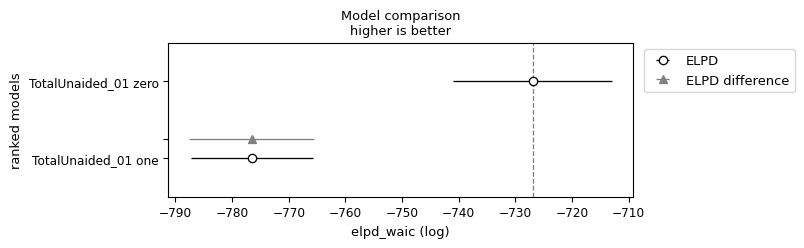

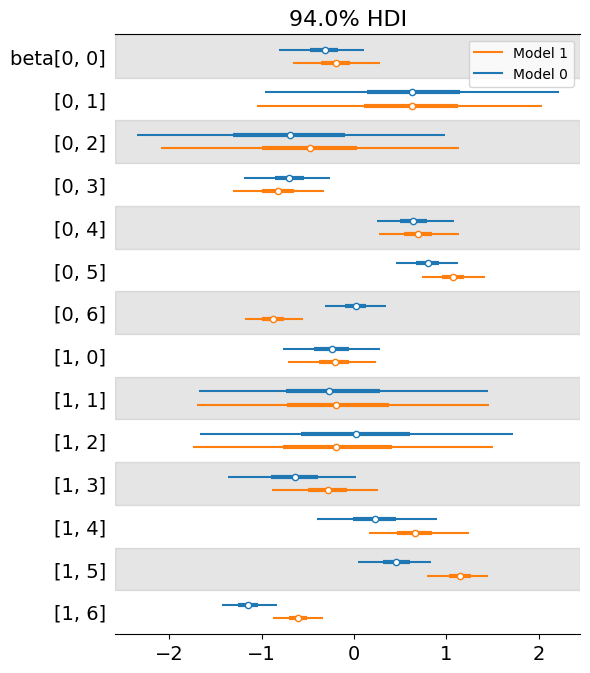

                             rank   elpd_waic     p_waic  elpd_diff    weight  \
Consideration_Top1_BBW zero     0 -536.520380  14.173353   0.000000  0.702255   
Consideration_Top1_BBW one      1 -546.400527  13.660380   9.880147  0.297745   

                                    se       dse  warning scale  
Consideration_Top1_BBW zero  18.449684  0.000000    False   log  
Consideration_Top1_BBW one   18.754664  7.281659    False   log  


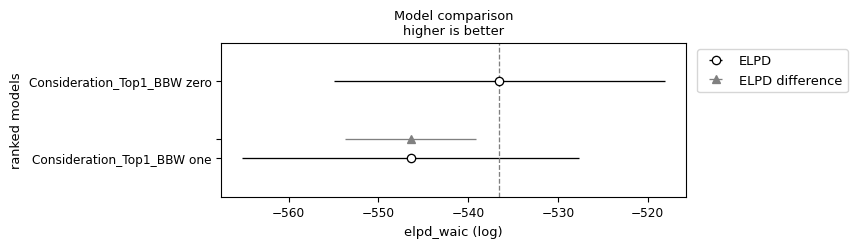

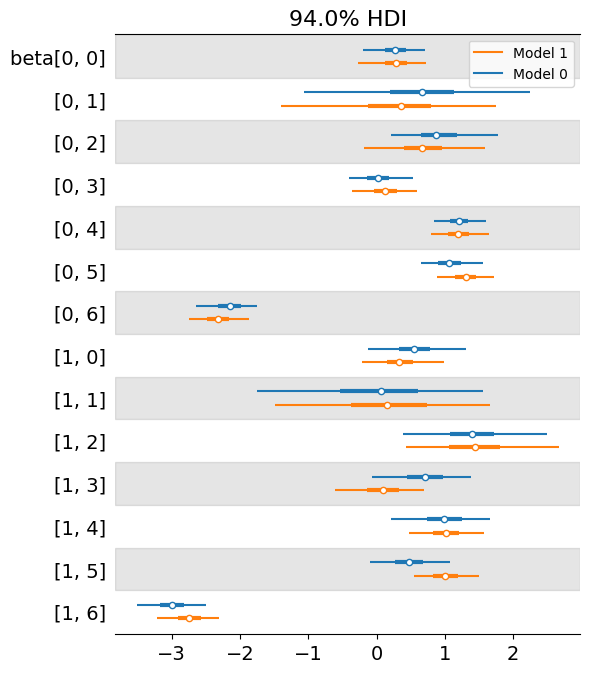

               rank   elpd_waic     p_waic  elpd_diff    weight         se  \
COMAW_01 zero     0 -756.170504  11.760874   0.000000  0.553924  11.394027   
COMAW_01 one      1 -756.930191  12.167923   0.759687  0.446076  11.400155   

                    dse  warning scale  
COMAW_01 zero  0.000000    False   log  
COMAW_01 one   3.813772    False   log  


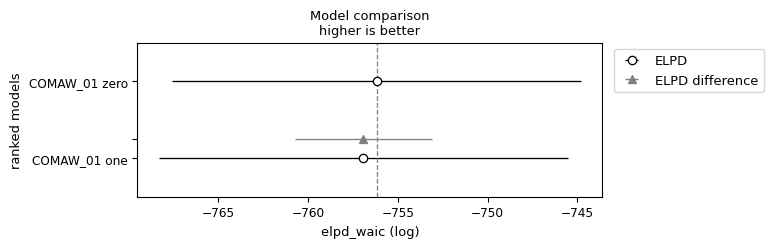

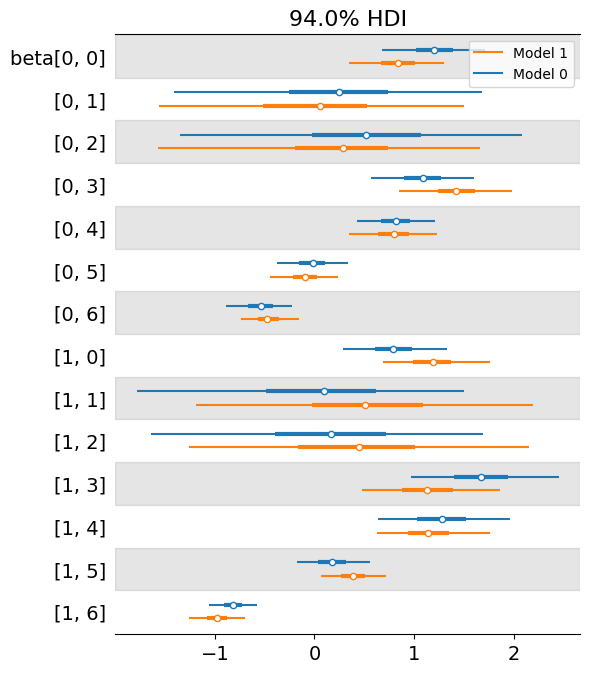

              rank   elpd_waic     p_waic  elpd_diff    weight         se  \
KPIA_01 zero     0 -674.777469  13.040795   0.000000  0.903684  16.247259   
KPIA_01 one      1 -700.129872  12.263510  25.352403  0.096316  15.155835   

                   dse  warning scale  
KPIA_01 zero  0.000000    False   log  
KPIA_01 one   7.978911    False   log  


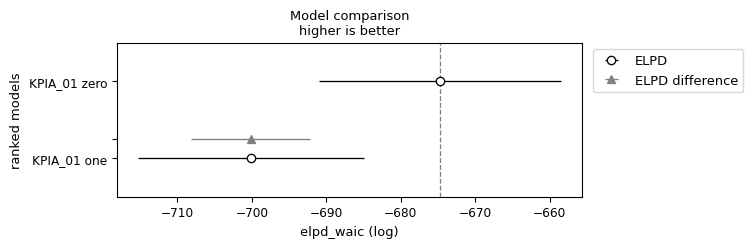

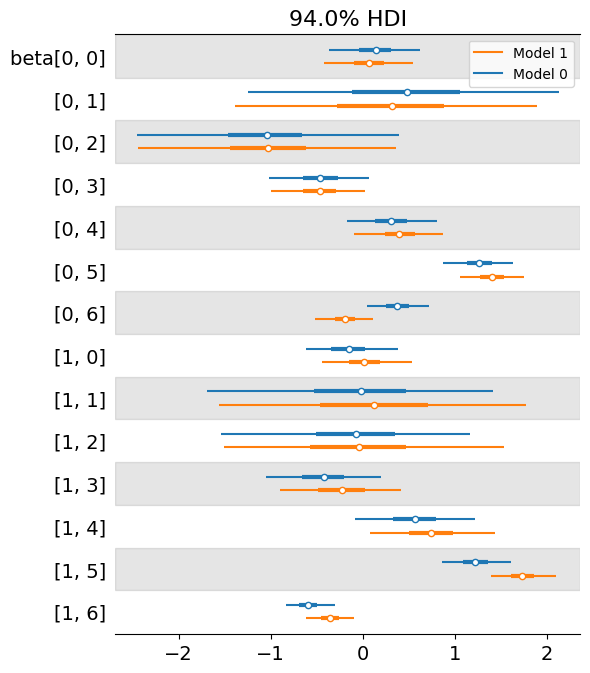

In [129]:
ModelBuildUtils().CompareSpecs([s1, s2], model_data)